In [25]:
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [26]:
from image import *

In [27]:
hists = get_hists(path='front/histograms.txt')
print(len(hists))

1000


In [28]:
name, hist = list(hists.keys()), list(hists.values())
for i,k in enumerate(hist):
    hist[i] = normalize_hist(k)
histos = [list(histo.values()) for histo in hist]

print(histos[:2])

[[1.0172526041666666e-05, 7.120768229166667e-05, 0.000152587890625, 0.0002543131510416667, 0.0005696614583333334, 0.0007731119791666666, 0.0021870930989583335, 0.0037740071614583335, 0.005442301432291667, 0.006103515625, 0.006785074869791667, 0.007212320963541667, 0.007212320963541667, 0.008127848307291666, 0.008514404296875, 0.008229573567708334, 0.008677164713541666, 0.008758544921875, 0.008249918619791666, 0.008280436197916666, 0.00872802734375, 0.008738199869791666, 0.008677164713541666, 0.009521484375, 0.009511311848958334, 0.009379069010416666, 0.009847005208333334, 0.009765625, 0.009602864583333334, 0.009552001953125, 0.009836832682291666, 0.009663899739583334, 0.009419759114583334, 0.010538736979166666, 0.010060628255208334, 0.01031494140625, 0.010854085286458334, 0.010813395182291666, 0.00994873046875, 0.009175618489583334, 0.008890787760416666, 0.008951822916666666, 0.00860595703125, 0.007436116536458333, 0.007700602213541667, 0.006947835286458333, 0.007161458333333333, 0.006

In [29]:
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(histos)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.008s...
[t-SNE] Computed neighbors for 1000 samples in 0.670s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.017163
[t-SNE] Computed conditional probabilities in 0.084s
[t-SNE] Iteration 50: error = 66.0081711, gradient norm = 0.2135095 (50 iterations in 2.259s)
[t-SNE] Iteration 100: error = 64.7736206, gradient norm = 0.1878114 (50 iterations in 2.207s)
[t-SNE] Iteration 150: error = 64.4777069, gradient norm = 0.1848162 (50 iterations in 2.348s)
[t-SNE] Iteration 200: error = 64.4380875, gradient norm = 0.1961282 (50 iterations in 2.020s)
[t-SNE] Iteration 250: error = 64.3706665, gradient norm = 0.2026910 (50 iterations in 2.072s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.370667
[t-SNE] Iteration 300: error = 0.9779079, gradient norm = 0.0007051 (50 iterations in 1.780s)
[t-SNE] Iteration 350: error = 0.9148954, gradient norm = 0.00022

In [30]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [41]:
import matplotlib.pyplot as plt
width = 4000
height = 3000
max_dim = 100
images = list(os.listdir('./corel1000/'))
print(len(images))

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open('corel1000/' + img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,10))
imshow(full_image)

1000


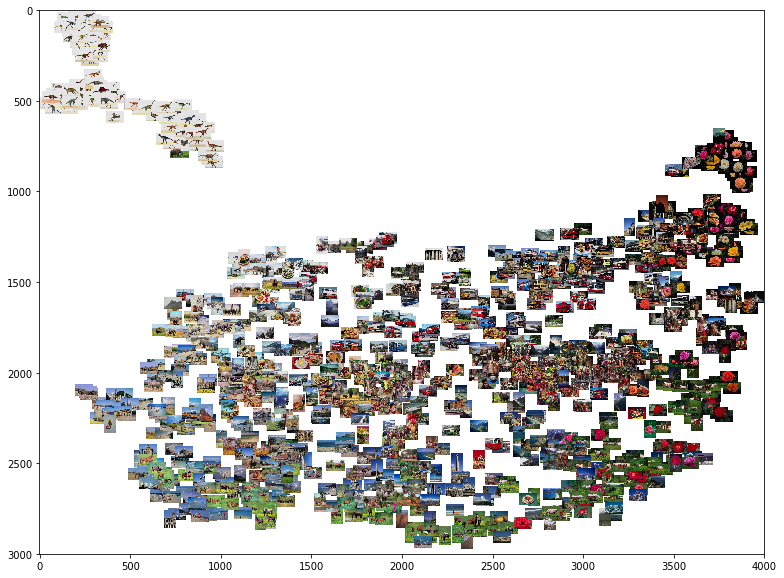

In [42]:
plt.show(full_image)
full_image.save("example-tSNE.png")